<h1>Requirements</h1>

In [1]:
!pip install matplotlib

In [1]:
!pip install seaborn

<h1>Importing Modules</h1>

In [1]:
# base modules
import math
import random
import time
from DebugAssistant import *

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#horner
from Old_Format.horner import Horner_method , Normal_method

#Interpolations
from Interpolations import Lagrange
from Interpolations import Newton
from Interpolations import CubicSpline
from Interpolations import LinearRegression

#Derivative
from Derivatives import NewtonDerivative

#EquationSolvers
from EquationSolvers import EquationSolvers

#Integral Calculators


<h1>Test Functions</h1>

In [3]:
def linspace(start : float,end : float,n : int):
    
    if start > end :
        raise ValueError(f"input is invalid")

    h = (end - start) / n

    values = []
    for i in range(n + 1):
        value = round(start + i * h,5)
        values.append(value)
    
    return values

In [4]:
def arange(start : float,end : float,step : float):
    
    if start > end :
        raise ValueError(f"input is invalid")

    values = []
    value = start

    while value <= end:
        values.append(value)
        value = round(value + step , 5)
    
    return values

<h1>Horner Method</h1>

<p> p(x) = 123.78*x^5 + 12*x^4 + 23*x^3 + 3*x^2 + 5*x^1 + 10 </p>

In [37]:
factors = [ 10 , 5 , 3 , 23 , 12 , 123.78]
x = 1024

In [39]:
start = time.time()

p_x = Normal_method(factors,x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(1024) = 1.3937710930772613e+17
time : 0.5003435611724854 s


In [41]:
start = time.time()

p_x = Horner_method(factors,x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(1024) = 1.3937710930772613e+17
time : 0.5003125667572021 s


<h1>Interpolations</h1>

<h2>Lagrange</h2>

In [9]:
x_points = [-1 , 0 , 2 , 3 ,  6] 
f_points = [ 1 , 0 , 4 , 9 , 36]

In [10]:
lagrange = Lagrange(x_points,f_points)

In [12]:
start = time.time()

x = random.uniform(lagrange.MinX,lagrange.MaxX)
p_x = lagrange(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

->> Lagrange Interpolation for p(5.241002542455425):
(-0.3439514355)*1 + (0.9556830886)*0 + (-2.3181426566)*4 + (2.2350432007)*9 + (0.4713678029)*36 = 27.4681076488
p(5.241002542455425) = 27.4681076488
time : 0.000637054443359375 s


In [15]:
debug_off()

plot_data_x = arange(lagrange.MinX,lagrange.MaxX, 0.1)
plot_data_y = list(map(lagrange,plot_data_x))

debug_on()

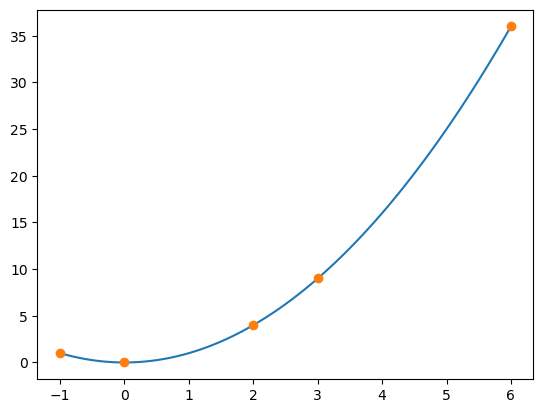

In [20]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Newton</h2>

<h3>Finite Differences</h3>

In [24]:
x_points = [-1 ,  0 ,  1 , 2 , 3]
f_points = [-1 , -2 , -1 , 2 , 7]
is_forward = True

In [26]:
finite_differences = Newton(x_points,f_points,is_forward=is_forward)
#finite_differences = Newton.FiniteDifferences(x_points,f_points,is_forward=is_forward)

                           -( Finite Differences Table )-                           
Δ^i f(x)\ Xi |      -1     |      0      |      1      |      2      |      3      |
     f(x)    |     (-1)    ↓      -2     ↓      -1     ↓      2      ↓      7      
   Δ^1 f(x)  |            (-1)    ↓      1      ↓      3      ↓      5      
   Δ^2 f(x)  |                   (2)     ↓      2      ↓      2      
   Δ^3 f(x)  |                          (0)     ↓      0      
   Δ^4 f(x)  |                                 (0)     


In [28]:
start = time.time()

x = random.uniform(finite_differences.MinX,finite_differences.MaxX)
p_x = finite_differences(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(2.782727928395564) = -1 + -1 * (3.7827279284) + 2 * (5.2631513259486775) + 0 * (3.1275889533880665) + 0 * (0.6120128055930414) = 5.7435747235
p(2.782727928395564) = 5.7435747235
time : 0.00034236907958984375 s


In [30]:
debug_off()

plot_data_x = arange(finite_differences.MinX,finite_differences.MaxX, 0.1)
plot_data_y = list(map(finite_differences,plot_data_x))

debug_on()

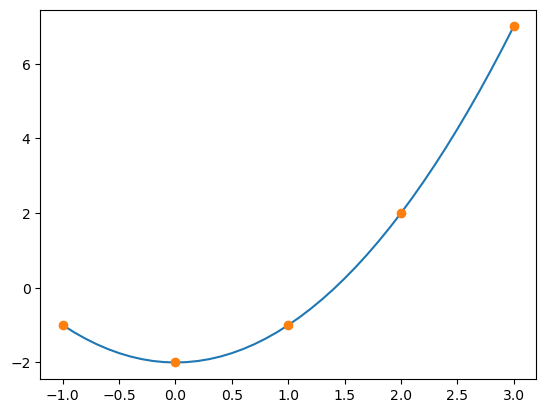

In [32]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h3>Divided Differences</h3>

In [35]:
x_points = [-1 ,  0 ,  2 ,   5 ,   6]
f_points = [-1 ,  0 ,  8 , 125 , 216]
is_forward = True

In [37]:
divided_differences = Newton(x_points,f_points,is_forward=is_forward)
#divided_differences = Newton.DividedDifferences(x_points,f_points,is_forward=is_forward)

                              -( Divided Differences Table )-                              
 f[xi,...,xi+k] \Xi |      -1     |      0      |      2      |      5      |      6      |
        f(x)        |     (-1)    ↓      0      ↓      8      ↓     125     ↓     216     
   f[xi,...xi+1]    |           (1.0)    ↓     4.0     ↓     39.0    ↓     91.0    
   f[xi,...xi+2]    |                  (1.0)    ↓     7.0     ↓     13.0    
   f[xi,...xi+3]    |                         (1.0)    ↓     1.0     
   f[xi,...xi+4]    |                                (0.0)    


In [39]:
start = time.time()

x = random.uniform(divided_differences.MinX,divided_differences.MaxX)
p_x = divided_differences(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(0.3382226534357722) = -1 + 91.0 * (1.3382226534) + 13.0 * (0.45261721667293653) + 1.0 * (-0.7521490373482298) + 0.0 * (3.506351343576975) = 0.03869083279999985
p(0.3382226534357722) = 0.03869083279999985
time : 0.0002727508544921875 s


In [41]:
debug_off()

plot_data_x = arange(divided_differences.MinX,divided_differences.MaxX, 0.1)
plot_data_y = list(map(divided_differences,plot_data_x))

debug_on()

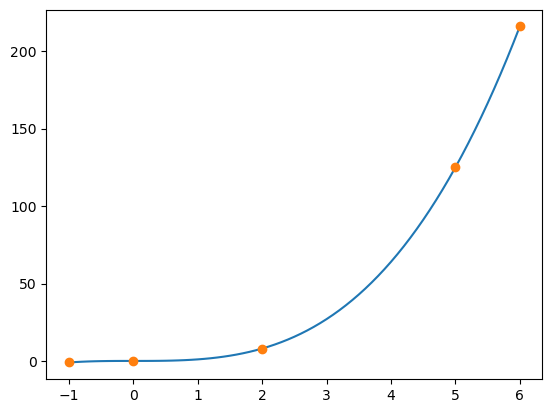

In [43]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Cubic Spline</h2>

In [49]:
x_points = [0 , 0.05 , 0.1]
f_points = [1 , 2    , 3  ]

In [51]:
cubic_spline = CubicSpline(x_points,f_points)

Spline Polynomials :
0 => S(x) = (1) + (20.0) * (x - 0) + (0) * (x - 0)^2 + (0.0) * (x - 0)^3                                         , x in [0 , 0.05]
1 => S(x) = (2) + (20.0) * (x - 0.05) + (0) * (x - 0.05)^2 + (0.0) * (x - 0.05)^3                                , x in [0.05 , 0.1]


In [53]:
start = time.time()

x = random.uniform(cubic_spline.MinX,cubic_spline.MaxX)
p_x = cubic_spline(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

0 => S(0.02688661390200149) = (1) + (20.0) * (0.02688661390200149 - 0) + (0) * (0.02688661390200149 - 0)^2 + (0.0) * (0.02688661390200149 - 0)^3  = 1.537732278
p(0.02688661390200149) = 1.537732278
time : 0.0003643035888671875 s


In [55]:
debug_off()

plot_data_x = arange(cubic_spline.MinX,cubic_spline.MaxX, 0.1)
plot_data_y = list(map(cubic_spline,plot_data_x))

debug_on()

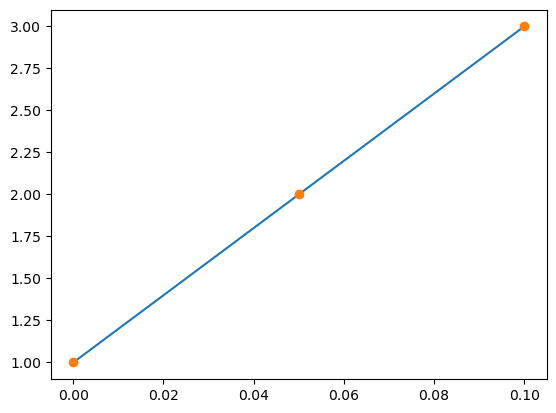

In [57]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Linear Regression</h2>

In [124]:
x_points = linspace(0,10,50)

f_x = lambda x : x**2 * random.uniform(0.70,1.3)

f_points = [f_x(x) for x in x_points]
k = 2

In [126]:
linear_regression = LinearRegression(x_points,f_points,k=k)

f(x) = 1.0561005333 * x^2 + -0.1686028699 * x + 0.067665639  ,MSE : 40.4006927989


In [128]:
start = time.time()

x = random.uniform(linear_regression.MinX,linear_regression.MaxX)
p_x = linear_regression(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

f(5.6025437460209275) = 1.0561005333 * 5.6025437460209275^2 + -0.1686028699 * 5.6025437460209275 + 0.067665639 = 32.2724684998
p(5.6025437460209275) = 32.2724684998
time : 0.00036644935607910156 s


In [130]:
debug_off()

plot_data_x = arange(linear_regression.MinX,linear_regression.MaxX, 0.1)
plot_data_y = list(map(linear_regression,plot_data_x))

debug_on()

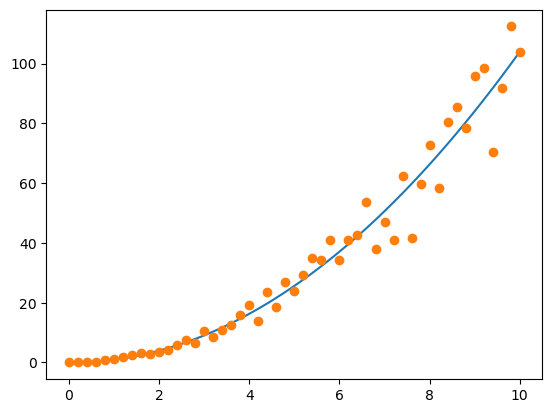

In [132]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h1>Derivatives</h1>

<h2>Newton Derivative</h2>

In [50]:
x_points = [ 0.1 , 0.2 , 0.3 , 0.4]
f_points = [-1   , 2   , 3   , 5]

In [52]:
newton_derivative = NewtonDerivative(x_points,f_points)

In [66]:
start = time.time()

x = 0.1
p_x = newton_derivative(x,step = -1)

end = time.time()

print(f"p'({x}) = {p_x}")
print(f"time : {end - start} s")

p'( 0.1 ) =( 3 * (1.0) + -2 * (-0.5) + 3 * (0.3333333333) ) * (10.0)= 49.999999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1) = 49.999999999
time : 0.0013518333435058594 s


In [68]:
start = time.time()

x = 0.1
p_x = newton_derivative.predict_next_step(x,step = -1)

end = time.time()

print(f"p'({x} + h) = {p_x}")
print(f"time : {end - start} s")

p'( 0.2 ) =( 3 * (1.0) + -2 * (0.5) + 3 * (-0.1666666667) ) * (10.0)= 14.999999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1 + h) = 14.999999999
time : 0.002607107162475586 s


In [72]:
start = time.time()

x = 0.1
p_x = newton_derivative.predict_next_half_step(x,step = -1)

end = time.time()

print(f"p'({x} + h/2) = {p_x}")
print(f"time : {end - start} s")

p'( 0.15 ) =( 3 * (1.0) + -2 * (0.0) + 3 * (-0.0416666667) ) * (10.0)= 28.749999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1 + h/2) = 28.749999999
time : 0.0011136531829833984 s


<h1>Equation Solvers</h1>

<p>4*x0 +   x1 + 2*x2 = 4</p></br>
<p>3*x0 + 5*x1 + x2 = 7</p></br>
<p>x0 +   x1 + 3*x2 = 3</p></br>

<h2>Gauss Jacobi</h2>

In [92]:
a         = [[4 , 1 , 2],
             [3 , 5 , 1],
             [1 , 1 , 3]]

b         =  [4 , 7 , 3]
starter_x =  [0 , 0 , 0]


In [108]:
answer_x = EquationSolvers.gauss_jacobi(a,starter_x,b,max_iteration = 20)
print()
print(f"Results = {answer_x}")

                             -( Gauss–Jacobi Table )-                               
iteration \ X |       X0      |       X1      |       X2      |   mean error  | note 
 iteration 0  |       0       |       0       |       0       |  4.6666666667 | 
 iteration 1  |      1.0      |      1.4      |  0.9999999999 |       3.0     | 
 iteration 2  |  0.1500000001 |      0.6      |      0.2      |  2.3333333333 | 
 iteration 3  |      0.75     |  1.2699999999 |  0.7499999999 |  1.6666666667 | 
 iteration 4  |  0.3075000001 |      0.8      |  0.3266666667 |  1.3333333333 | 
 iteration 5  |  0.6366666667 |  1.1501666666 |  0.6308333332 |       1.0     | 
 iteration 6  |  0.3970416667 |  0.8918333333 |  0.4043888889 |  0.6666666667 | 
 iteration 7  |  0.5748472222 |  1.0808972222 |  0.5703749999 |  0.6666666667 | 
 iteration 8  |  0.4445881945 |  0.9410166667 |  0.4480851852 |  0.3333333333 | 
 iteration 9  |  0.5407032407 |  1.0436300463 |  0.5381317129 |       0.0     | 

Results = [0.54070

<h2>Gauss Seidel</h2>

In [111]:
a         = [[4 , 1 , 2],
             [3 , 5 , 1],
             [1 , 1 , 3]]

b         =  [4 , 7 , 3]
starter_x =  [0 , 0 , 0]

In [113]:
answer_x = EquationSolvers.gauss_seidel(a,starter_x,b,max_iteration = 20)
print()
print(f"Results = {answer_x}")

                             -( Gauss–Seidel Table )-                               
iteration \ X |       X0      |       X1      |       X2      |   mean error  | note 
 iteration 0  |       0       |       0       |       0       |  4.6666666667 | 
 iteration 1  |      1.0      |      0.8      |      0.4      |  0.6666666667 | 
 iteration 2  |      0.6      |      0.96     |      0.48     |       0.0     | 

Results = [0.6, 0.96, 0.48]


<h1>Integral Calculators</h1>